In [1]:
# import or define evaluate_classification, plot_decision_boundary, plot_data

from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

In [2]:
def load_dataset(filename, data_columns, target_column):
    """Load dataset from CSV file.

    Args:
        filename (str): Path to CSV file.
        data_columns (list): List of column names for data.
        target_column (str): Name of target column.

    Returns:
        tuple: Tuple containing data and target.
    """
    
    df = pd.read_csv(filename)
    X, y = df[data_columns], df[target_column]
    return X.values, y.values

In [3]:
class LogisticRegression:
    """Logistic Regression Classifier."""
    def __init__(self, standardize=True, 
                 learning_rate=0.01, 
                 max_iter=1000,
                 tol=1e-4,
                 verbose=False):
        """Initialize Logistic Regression Classifier.
        
        Args:
            standardize (bool): Whether to standardize the data.
            learning_rate (float): Learning rate for gradient descent.
            max_iter (int): Maximum number of iterations for gradient descent.
            tol (float): Tolerance for gradient descent.
            verbose (bool): Whether to print cost at each 100th iteration.
        """
        self.standardize = standardize
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose

    def normalize(self, X):
        """Normalize the data.
        
        Args:
            X (array): Data to normalize.
        
        Returns:
            tuple: Tuple containing normalized data, mean, and standard deviation.
        """
        # TODO: Implement
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        X_new = (X-mean)/std
        return X_new, mean, std

    def add_intercept(self, X):
        """Add intercept term to the data.
        
        Args:
            X (array): Data to add intercept term.
        
        Returns:
            array: Data with intercept term."""
        m = X.shape[0]
        ones = np.ones((m, 1))
        X_new = np.column_stack((ones, X))
        return X_new

    def sigmoid(self, z):
        """Sigmoid function.
        
        Args:
            z (array): Input to sigmoid function.
            
        Returns:
            array: Output of sigmoid function."""
        # TODO: Implement
        h = 1/(1 + np.exp(-z))
        return h
    
    def hypothesis(self, X, theta):
        """Hypothesis function.
        
        Args:
            X (array): Data.
            theta (array): Parameters.
        
        Returns:
            array: Output of hypothesis function."""
        # TODO: Implement
        z = np.dot(X,theta)
        return self.sigmoid(z)

    def cost_function(self, X, y, theta):
        """Cost function.
        
        Args:
            X (array): Data.
            y (array): Target.
            theta (array): Parameters.
            
        Returns:
            float: Cost of hypothesis function."""
        # TODO: Implement
        m = X.shape[0]
        if m == 0:
            return None
        #transpose error????/
        A = self.hypothesis(X,theta)
        cost = -(np.dot(y.T, np.log(A)) + np.dot((1-y).T,np.log(1-A)))/m
        return cost

    def gradient(self, X, y, theta):
        """Gradient of cost function.
        
        Args:
            X (array): Data.
            y (array): Target.
            theta (array): Parameters.
            
        Returns:
            array: Gradient of cost function."""
        # TODO: Implement
        A = self.hypothesis(X,theta)
        grad = np.dot(X.T, (A-y))
        return grad

    def gradient_descent(self, X, y, theta):
        """Gradient descent algorithm.

        Args:
            X (array): Data.
            y (array): Target.
            theta (array): Parameters.
        
        Returns:
            tuple: Tuple containing parameters and costs."""
        costs = []
        J = self.cost_function(X, y, theta)
        costs.append(J)

        if self.verbose:
            print(f"Iteration 0 Cost: {J}")

        for i in range(1, self.max_iter + 1):
            # TODO: Implement
            grad = self.gradient(X,y,theta)
            theta = theta - self.learning_rate*grad
            cost = self.cost_function(X,y,theta)
            
            costs.append(cost)

            if i % 100 == 0 and self.verbose:
                print(f"Iteration {i} Cost: {cost}")

            if np.abs(costs[i] - costs[i - 1]) < self.tol:
                print(f"Converged at iteration {i}")
                break

        return theta, costs
    
    def fit(self, X, y):
        """Fit the model.

        Args:
            X (array): Data.
            y (array): Target."""
        if self.standardize:
            X_new, self.mean, self.std = self.normalize(X)
        X_new = self.add_intercept(X_new)

        self.theta = np.zeros(X_new.shape[1])
        self.theta, self.costs = self.gradient_descent(X_new, y, self.theta)

    def predict(self, X):
        """Predict the target.

        Args:
            X (array): Data.

        Returns:
            array: Predicted target."""
        # TODO: Implement
        if self.standardize:
            X_new,mean,std = self.normalize(X)
        X_new = self.add_intercept(X_new)
        
        
        proba_vec = self.hypothesis(X_new, self.theta)
        y_pred = [1 if i > 0.5 else 0 for i in proba_vec]
        return y_pred

    def predict_proba(self, X):
        """Predict the probability of target.
        
        Args:
            X (array): Data.
        
        Returns:
            array: Predicted probability of target."""
        # TODO: Implement
        if self.standardize:
            X_new,mean,std = self.normalize(X)
        X_new = self.add_intercept(X_new)

        h = self.hypothesis(X_new, self.theta)
        return np.column_stack((1-h, h))

In [4]:
def evaluate_classification(y_true, y_pred, labels = None):
    """
    Evaluate classification model performance.
    Args:        y_true (array): Ground truth values.
    y_pred (array): Predicted values.
    labels (list): List of labels to index the matrix.
    Returns:        accuracy (float): Accuracy score.    
    report (pd.DataFrame): Classification report.
    confusion_matrix (pd.DataFrame): Confusion matrix.
    """
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    confusion = pd.DataFrame(confusion_matrix(y_true, y_pred), labels, labels)
    return accuracy, report, confusion

def plot_data(X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

        
def plot_decision_boundary(model, X, y):
    x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25, 50)
    y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25, 50)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict_proba(grid)[:,0]
    z = pred_func.reshape(xx.shape)
    c = plt.contourf(xx, yy, z, cmap="RdYlGn")
    plt.colorbar(c)
    colors = list(mcolors.TABLEAU_COLORS.keys())
    color_values = [colors[int(label)] for label in y]
    plt.scatter(X[:, 0], X[:, 1], marker="x", c=color_values)


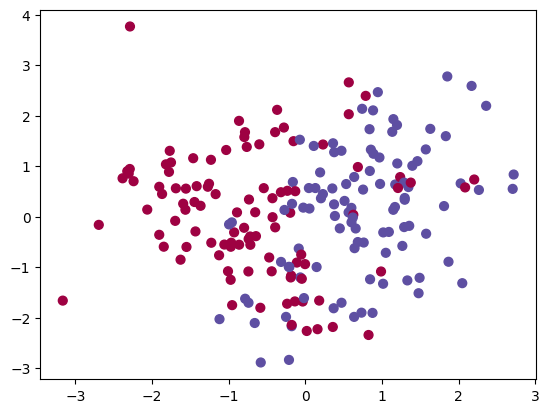

In [5]:
X, y = make_classification(n_samples = 200, n_classes = 2, n_features = 2, 
                           n_informative=2, n_redundant=0, random_state = 42,
                           flip_y=0.02, class_sep=0.8)
plot_data(X, y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
lr = LogisticRegression(standardize=True, learning_rate=0.01, max_iter=1000, tol=1e-4, verbose=True)

In [8]:
lr.fit(X_train, y_train)

Iteration 0 Cost: 0.6931471805599452
Converged at iteration 23


In [9]:
y_test_pred = lr.predict(X_test)

Accuracy: 
0.775
Report: 
              precision    recall  f1-score   support

           0       0.84      0.73      0.78        22
           1       0.71      0.83      0.77        18

    accuracy                           0.78        40
   macro avg       0.78      0.78      0.77        40
weighted avg       0.78      0.78      0.78        40

Confusion: 
    0   1
0  16   6
1   3  15


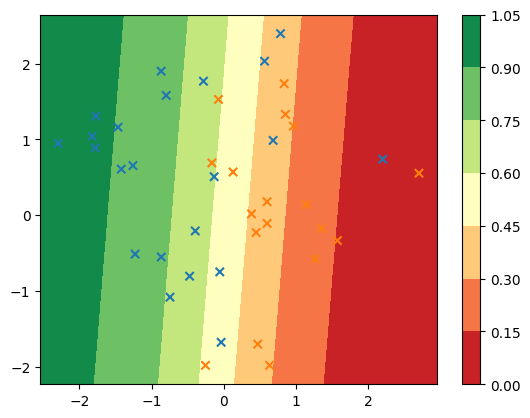

In [10]:
accuracy, report, confusion = evaluate_classification(y_test, y_test_pred)
print(f"Accuracy: \n{accuracy}")
print(f"Report: \n{report}")
print(f"Confusion: \n{confusion}")
plot_decision_boundary(lr, X_test, y_test)
plt.show()

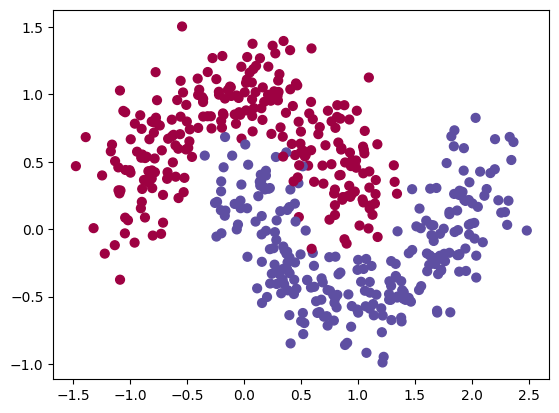

In [11]:
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
plot_data(X, y)

Converged at iteration 296
Converged at iteration 296
Accuracy: 
0.95
Report: 
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        43
           1       1.00      0.91      0.95        57

    accuracy                           0.95       100
   macro avg       0.95      0.96      0.95       100
weighted avg       0.96      0.95      0.95       100

Confusion: 
    0   1
0  43   0
1   5  52


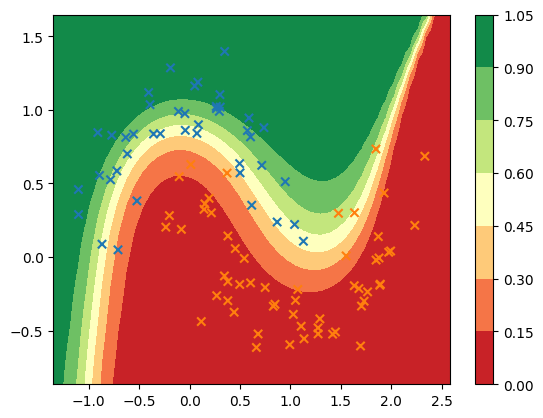

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline = Pipeline([
            ('poly', PolynomialFeatures(degree=4, include_bias = False)),
            ('model', LogisticRegression())
        ])
lr = pipeline.fit(X_train, y_train)
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)

accuracy, report, confusion = evaluate_classification(y_test, y_test_pred)
print(f"Accuracy: \n{accuracy}")
print(f"Report: \n{report}")
print(f"Confusion: \n{confusion}")
plot_decision_boundary(lr, X_test, y_test)
plt.show()

Evaluate the above LogisticRegression class on datasets sats.csv and tests.csv. Consider using polynomial features when applicable.

In [13]:
data_columns = ["exam1", "exam2"]
target_column = "submitted"
X, y = load_dataset('sats.csv', data_columns, target_column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80, 2) (20, 2) (80,) (20,)


Iteration 0 Cost: 0.6931471805599452
Iteration 100 Cost: 0.18593034560687505
Converged at iteration 152
Accuracy: 
0.9
Report: 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.92      0.92      0.92        12

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20

Confusion: 
   0   1
0  7   1
1  1  11


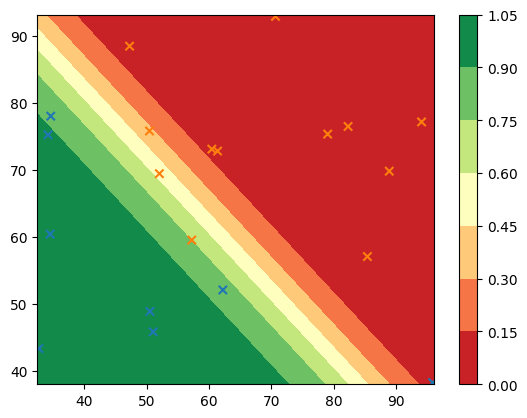

In [14]:
lr = LogisticRegression(standardize=True, learning_rate=0.01, max_iter=1000, tol=1e-4, verbose=True)
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)

accuracy, report, confusion = evaluate_classification(y_test, y_test_pred)
print(f"Accuracy: \n{accuracy}")
print(f"Report: \n{report}")
print(f"Confusion: \n{confusion}")
plot_decision_boundary(lr, X_test, y_test)
plt.show()

Converged at iteration 354
Converged at iteration 354
Accuracy: 
1.0
Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion: 
   0   1
0  8   0
1  0  12


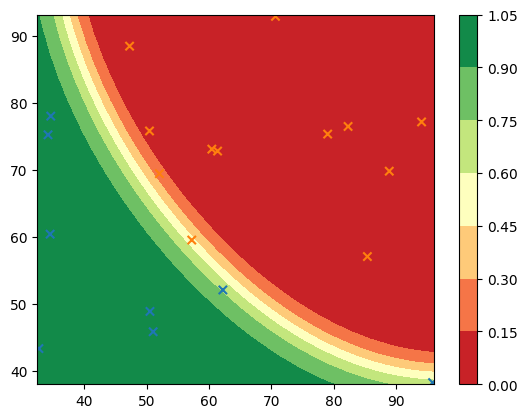

In [15]:
pipeline = Pipeline([
            ('poly', PolynomialFeatures(degree=5, include_bias = False)),
            ('model', LogisticRegression())
        ])
lr = pipeline.fit(X_train, y_train)

lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)

accuracy, report, confusion = evaluate_classification(y_test, y_test_pred)
print(f"Accuracy: \n{accuracy}")
print(f"Report: \n{report}")
print(f"Confusion: \n{confusion}")
plot_decision_boundary(lr, X_test, y_test)
plt.show()

In [16]:
data_columns = ["test1", "test2"]
target_column = "passed"
X, y = load_dataset('tests.csv', data_columns, target_column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(94, 2) (24, 2) (94,) (24,)


Iteration 0 Cost: 0.6931471805599451
Converged at iteration 8
Accuracy: 
0.4166666666666667
Report: 
              precision    recall  f1-score   support

           0       0.40      0.33      0.36        12
           1       0.43      0.50      0.46        12

    accuracy                           0.42        24
   macro avg       0.41      0.42      0.41        24
weighted avg       0.41      0.42      0.41        24

Confusion: 
   0  1
0  4  8
1  6  6


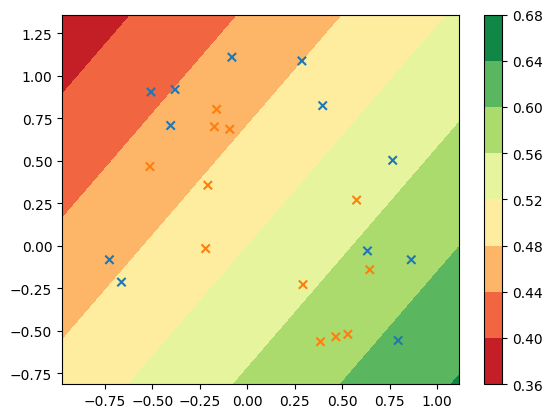

In [17]:
lr = LogisticRegression(standardize=True, learning_rate=0.01, max_iter=1000, tol=1e-4, verbose=True)
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)

accuracy, report, confusion = evaluate_classification(y_test, y_test_pred)
print(f"Accuracy: \n{accuracy}")
print(f"Report: \n{report}")
print(f"Confusion: \n{confusion}")
plot_decision_boundary(lr, X_test, y_test)
plt.show()

Converged at iteration 128
Converged at iteration 126
Converged at iteration 122
Converged at iteration 151
Converged at iteration 147
Converged at iteration 140
Converged at iteration 137
Converged at iteration 134
Converged at iteration 136
Converged at iteration 136
Converged at iteration 139
Converged at iteration 142
Converged at iteration 146
Converged at iteration 149
Converged at iteration 152
Converged at iteration 155
Converged at iteration 156
Converged at iteration 158
Converged at iteration 159
Converged at iteration 160
Converged at iteration 160
Converged at iteration 159
Converged at iteration 159
Converged at iteration 158
Converged at iteration 157
Converged at iteration 157
Converged at iteration 156
Converged at iteration 155
Converged at iteration 155
Converged at iteration 154
Converged at iteration 155
Converged at iteration 155
Converged at iteration 155
maximum precision 0.9166666666666666 on index 18


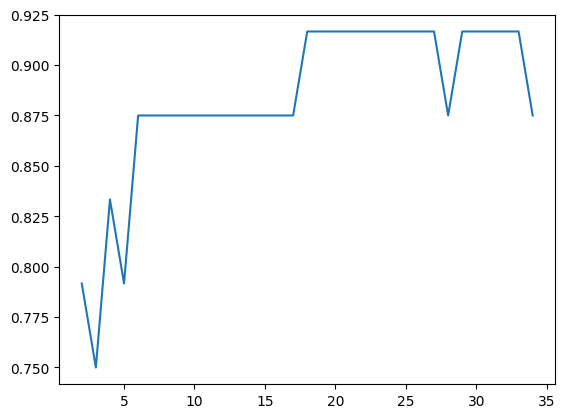

Converged at iteration 156
Accuracy: 
0.9166666666666666
Report: 
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.86      1.00      0.92        12

    accuracy                           0.92        24
   macro avg       0.93      0.92      0.92        24
weighted avg       0.93      0.92      0.92        24

Confusion: 
    0   1
0  10   2
1   0  12


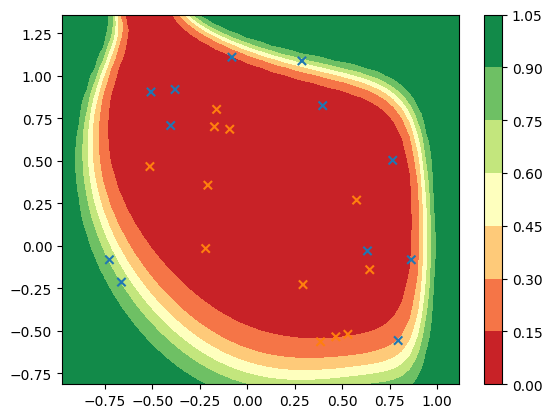

In [24]:
#
accur = np.array([])
n = 35
for deg in range(2,n):
    pipeline = Pipeline([
                ('poly', PolynomialFeatures(degree=deg, include_bias = False)),
                ('model', LogisticRegression())
            ])
    lr = pipeline.fit(X_train, y_train)
    y_test_pred = lr.predict(X_test)
    accuracy, report, confusion = evaluate_classification(y_test, y_test_pred)
    accur = np.append(accur,accuracy)

    
print("maximum precision", accur.max(), "on index", accur.argmax()+2)    
plt.plot(range(2,n),accur)
plt.show()

pipeline = Pipeline([
            ('poly', PolynomialFeatures(degree=accur.argmax()+2, include_bias = False)),
            ('model', LogisticRegression())
         ])
lr = pipeline.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)
accuracy, report, confusion = evaluate_classification(y_test, y_test_pred)

    
print(f"Accuracy: \n{accuracy}")
print(f"Report: \n{report}")
print(f"Confusion: \n{confusion}")
plot_decision_boundary(lr, X_test, y_test)
plt.show()